In [15]:
import pandas as pd

#read csv
df = pd.read_csv("fish_data.csv", sep=';', quotechar='"', encoding='utf8')
print (df)

   lightness  countSalmon  countSeaBass
0      0-0.5            0             0
1    0.5-1.0            2             0
2    1.0-1.5            8             0
3    1.5-2.0            4             0
4    2.0-2.5            7             0
5    2.5-3.0           10             0
6    3.0-3.5           12             0
7    3.5-4.0            8             1
8    4.0-4.5            6             0
9    4.5-5.0            8             3
10   5.0-5.5            4             3
11   5.5-6.0            3             4
12   6.0-6.5            1             6
13   6.5-7.0            1             5
14   7.0-7.5            0            12
15   7.5-8.0            0             9
16   8.0-8.5            0             9
17   8.5-9.0            0             2
18   9.0-9.5            0             1
19    9.5-10            0             2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc704f831d0>,
      dtype=object)

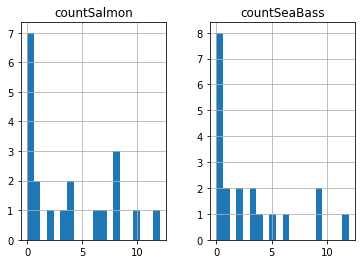

In [16]:
#show csv
df.hist(bins=20)

In [20]:
#no 2
dataSalmon = df['countSalmon'].tolist() 
dataSeaBass = df['countSeaBass'].tolist()
Range = df['lightness'].tolist()

#calculate Sum of Salmon and Seabass
sumSalmon = sum(dataSalmon)
sumSeaBass = sum(dataSeaBass)

#Calculate probability of salmon P(w1) and probability of Seabass P(w2)
prSalmon = sumSalmon/(sumSalmon+sumSeaBass)
prSeaBass = sumSeaBass/(sumSalmon+sumSeaBass)

print(prSalmon)
print(prSeaBass)

0.5648854961832062
0.4351145038167939


In [21]:
#Posterior conditional probability
def Posterior (data,sumf,prob):
    probability = []
    for i in data :
        pr = i/sumf
        pr_s = prob*pr
        probability.append(pr_s)
    return probability

salmon = Posterior(dataSalmon,sumSalmon,prSalmon)
seabass = Posterior(dataSeaBass,sumSeaBass,prSeaBass)
print(salmon)
print(seabass)

[0.0, 0.015267175572519087, 0.06106870229007635, 0.030534351145038174, 0.0534351145038168, 0.07633587786259544, 0.09160305343511452, 0.06106870229007635, 0.04580152671755726, 0.06106870229007635, 0.030534351145038174, 0.02290076335877863, 0.007633587786259543, 0.007633587786259543, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007633587786259542, 0.0, 0.022900763358778626, 0.022900763358778626, 0.030534351145038167, 0.04580152671755725, 0.03816793893129771, 0.0916030534351145, 0.06870229007633588, 0.06870229007633588, 0.015267175572519083, 0.007633587786259542, 0.015267175572519083]


In [22]:
#create the classification based on posterior
def Classify (salmon,seabass):
    pilih = []
    #compare between salmon and seabass
    for i in range(len(salmon)):
        if salmon[i] > seabass[i]:
            pilih.append("Salmon")
        elif salmon[i] < seabass[i]:
            pilih.append("Sea Bass")
        else :
            pilih.append("Either")
    return pilih
cdb = Classify(salmon,seabass)

In [26]:
#Create the Table
table = pd.DataFrame({
    "Range of Lightness" : Range,
    "P(w1|x)" : salmon,
    "P(w2|x)" : seabass,
    "Class" : cdb
})
print (table)

   Range of Lightness   P(w1|x)   P(w2|x)     Class
0               0-0.5  0.000000  0.000000    Either
1             0.5-1.0  0.015267  0.000000    Salmon
2             1.0-1.5  0.061069  0.000000    Salmon
3             1.5-2.0  0.030534  0.000000    Salmon
4             2.0-2.5  0.053435  0.000000    Salmon
5             2.5-3.0  0.076336  0.000000    Salmon
6             3.0-3.5  0.091603  0.000000    Salmon
7             3.5-4.0  0.061069  0.007634    Salmon
8             4.0-4.5  0.045802  0.000000    Salmon
9             4.5-5.0  0.061069  0.022901    Salmon
10            5.0-5.5  0.030534  0.022901    Salmon
11            5.5-6.0  0.022901  0.030534  Sea Bass
12            6.0-6.5  0.007634  0.045802  Sea Bass
13            6.5-7.0  0.007634  0.038168  Sea Bass
14            7.0-7.5  0.000000  0.091603  Sea Bass
15            7.5-8.0  0.000000  0.068702  Sea Bass
16            8.0-8.5  0.000000  0.068702  Sea Bass
17            8.5-9.0  0.000000  0.015267  Sea Bass
18          

In [27]:
#calculate P(x|w1) and P(x|w2)
def MinRisk (data,sumf):
    probability = []
    for i in data :
        #perhitungan perkalian yang di slide
        pr = i/sumf
        probability.append(pr)
    return probability
prsl = MinRisk(dataSalmon,sumSalmon)
prse = MinRisk(dataSeaBass,sumSeaBass)
print(prsl)
print(prse)

[0.0, 0.02702702702702703, 0.10810810810810811, 0.05405405405405406, 0.0945945945945946, 0.13513513513513514, 0.16216216216216217, 0.10810810810810811, 0.08108108108108109, 0.10810810810810811, 0.05405405405405406, 0.04054054054054054, 0.013513513513513514, 0.013513513513513514, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017543859649122806, 0.0, 0.05263157894736842, 0.05263157894736842, 0.07017543859649122, 0.10526315789473684, 0.08771929824561403, 0.21052631578947367, 0.15789473684210525, 0.15789473684210525, 0.03508771929824561, 0.017543859649122806, 0.03508771929824561]


In [28]:
#Calculate Likelihood Ratio
nilaiSalmon = []
for j in prsl :
    if j == 0.0:
        j = j + 0.0001
    nilaiSalmon.append(j)

nilaiSeaBass = []
for k in prse :
    if k == 0.0:
        k = k + 0.0001
    nilaiSeaBass.append(k)

#Calculate LR
LR = []
for m in range(len(nilaiSalmon)):
    lr = nilaiSalmon[m]/nilaiSeaBass[m]
    LR.append(lr)
print(LR)

[1.0, 270.27027027027026, 1081.081081081081, 540.5405405405405, 945.9459459459459, 1351.3513513513515, 1621.6216216216217, 6.162162162162163, 810.8108108108108, 2.0540540540540544, 1.0270270270270272, 0.5777027027027027, 0.1283783783783784, 0.15405405405405406, 0.00047500000000000005, 0.0006333333333333334, 0.0006333333333333334, 0.00285, 0.0057, 0.00285]


In [29]:
#calculate treshold
threshold = (((1-0)/(1-0))*(prSeaBass/prSalmon))
print(threshold)

0.7702702702702702


In [30]:
chooseminrisk = []
for n in LR:
    if n > threshold:
        chooseminrisk.append("Salmon")
    else:
        chooseminrisk.append("Sea Basss")
print (chooseminrisk)

['Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Sea Basss', 'Sea Basss', 'Sea Basss', 'Sea Basss', 'Sea Basss', 'Sea Basss', 'Sea Basss', 'Sea Basss', 'Sea Basss']


In [32]:
table1 = pd.DataFrame({
    "Range of Lightness" : Range,
    "Likelihood" : LR,
    "Class" : chooseminrisk
})
print (table1)

   Range of Lightness   Likelihood      Class
0               0-0.5     1.000000     Salmon
1             0.5-1.0   270.270270     Salmon
2             1.0-1.5  1081.081081     Salmon
3             1.5-2.0   540.540541     Salmon
4             2.0-2.5   945.945946     Salmon
5             2.5-3.0  1351.351351     Salmon
6             3.0-3.5  1621.621622     Salmon
7             3.5-4.0     6.162162     Salmon
8             4.0-4.5   810.810811     Salmon
9             4.5-5.0     2.054054     Salmon
10            5.0-5.5     1.027027     Salmon
11            5.5-6.0     0.577703  Sea Basss
12            6.0-6.5     0.128378  Sea Basss
13            6.5-7.0     0.154054  Sea Basss
14            7.0-7.5     0.000475  Sea Basss
15            7.5-8.0     0.000633  Sea Basss
16            8.0-8.5     0.000633  Sea Basss
17            8.5-9.0     0.002850  Sea Basss
18            9.0-9.5     0.005700  Sea Basss
19             9.5-10     0.002850  Sea Basss
